In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [6]:
insurance_data = pd.read_csv("D:/dataset/insurance.csv")

In [7]:
insurance_data.head()

,age,gender,bmi,children,smoker,region,Premium
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
insurance_data.shape

(1338, 7)

In [9]:
insurance_data.describe()

,age,bmi,children,Premium
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
insurance_data['gender'].dtype

dtype('O')

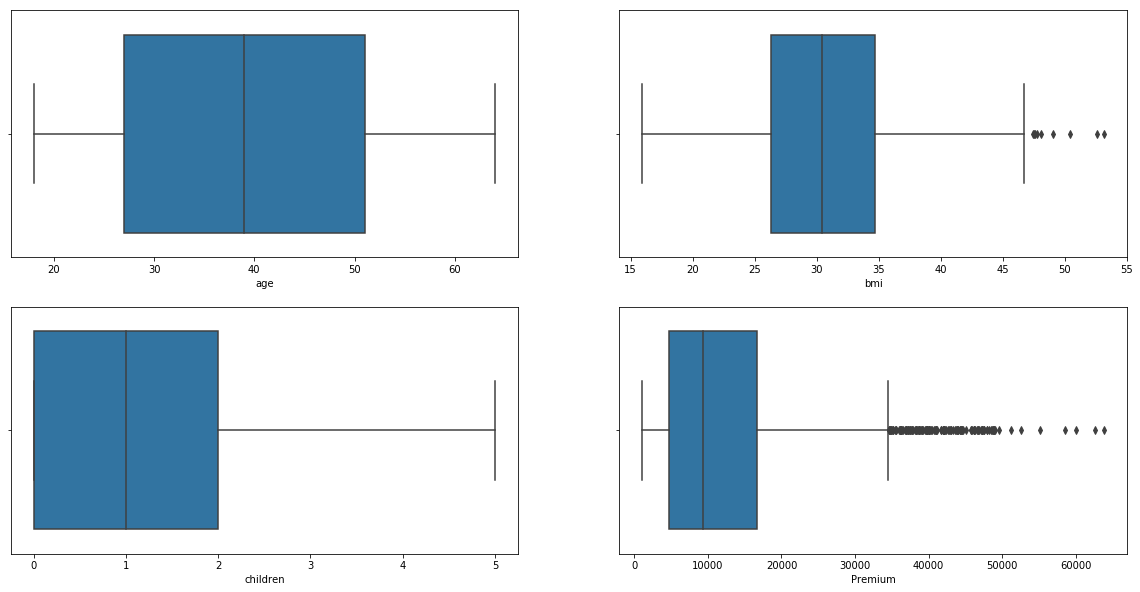

In [11]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,2,1)
sns.boxplot(insurance_data['age'])
fig.add_subplot(2,2,2)
sns.boxplot(insurance_data['bmi'])
fig.add_subplot(2,2,3)
sns.boxplot(insurance_data['children'])
fig.add_subplot(2,2,4)
sns.boxplot(insurance_data['Premium'])

In [12]:
def outlier(df):
    quartile = {}
    for i in df.columns.tolist():
        if df[i].dtype!='O':
            Q1,Q3 = np.percentile(df[i],[25,75])
            print(Q1,Q3)
            IQR = Q3-Q1
            higher_bound = Q3+(1.5*IQR)
            lower_bound = Q1-(1.5*IQR)
            quartile[i]= [higher_bound,lower_bound]
    return quartile

In [13]:
outlier(insurance_data)

27.0 51.0
26.29625 34.69375
0.0 2.0
4740.28715 16639.912515


{'age': [87.0, -9.0],
 'bmi': [47.290000000000006, 13.7],
 'children': [5.0, -3.0],
 'Premium': [34489.350562499996, -13109.1508975]}

In [14]:
IQR = 51-27

In [15]:
IQR

24

In [16]:
insurance_data_df = insurance_data.drop(insurance_data[insurance_data['bmi']>47].index,axis=0)

In [17]:
insurance_data_df.shape

(1329, 7)

In [18]:
insurance_data_df[insurance_data_df['Premium']>34489].head()

,age,gender,bmi,children,smoker,region,Premium
14,27,male,42.13,0,occasionally,southeast,39611.7577
19,30,male,35.30,0,occasionally,southwest,36837.4670
23,34,female,31.92,1,occasionally,northeast,37701.8768
29,31,male,36.30,2,occasionally,southwest,38711.0000
30,22,male,35.60,0,occasionally,southwest,35585.5760


In [19]:
insurance_data.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
Premium     0
dtype: int64

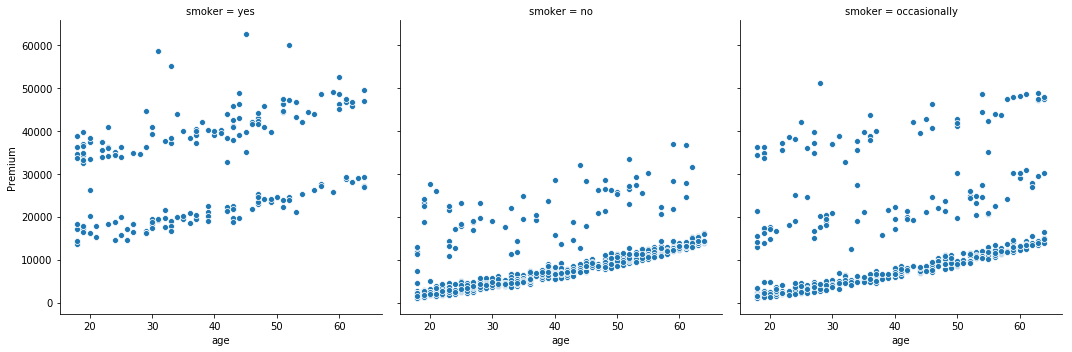

In [20]:
sns.relplot(x='age',y='Premium',col='smoker',data=insurance_data_df)

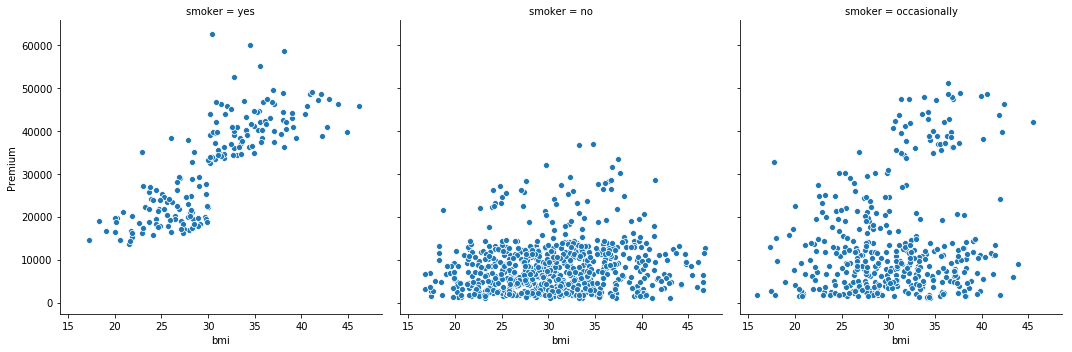

In [21]:
sns.relplot(x='bmi',y='Premium',col='smoker',data=insurance_data_df)

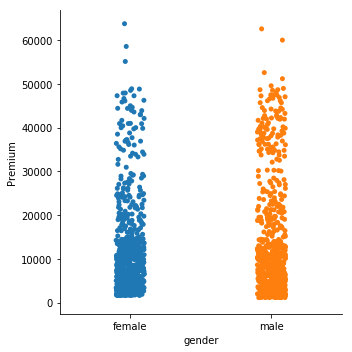

In [22]:
sns.catplot(x='gender',y='Premium',data=insurance_data)

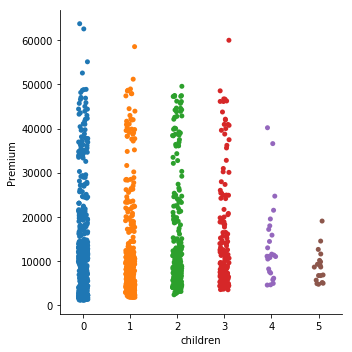

In [23]:
sns.catplot(x='children',y='Premium',data=insurance_data)

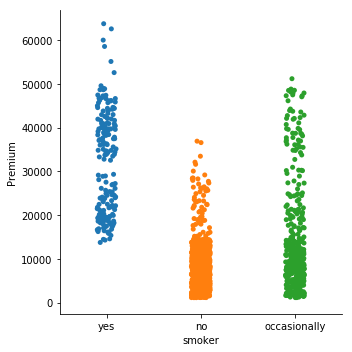

In [24]:
sns.catplot(x='smoker',y='Premium',data=insurance_data)

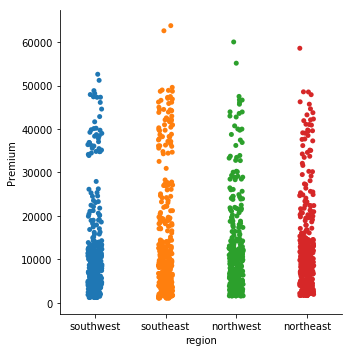

In [25]:
sns.catplot(x='region',y='Premium',data=insurance_data)

In [26]:
insurance_data_df.corr()

,age,bmi,children,Premium
age,1.000000,0.114686,0.043041,0.302022
bmi,0.114686,1.000000,0.017355,0.193196
children,0.043041,0.017355,1.000000,0.069739
Premium,0.302022,0.193196,0.069739,1.000000


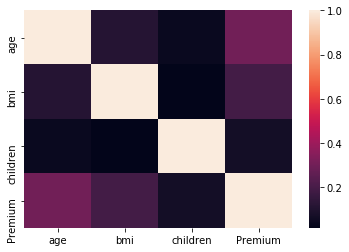

In [27]:
sns.heatmap(insurance_data_df.corr())

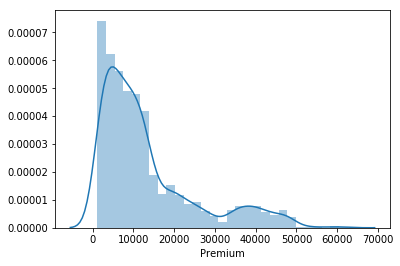

In [28]:
sns.distplot(insurance_data_df['Premium'])

In [29]:
insurance_data_df['Premium'] = np.log(insurance_data_df['Premium'])

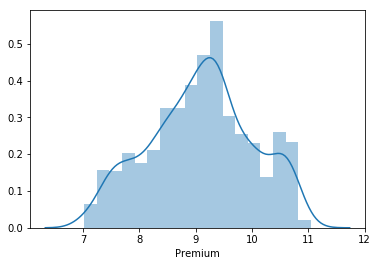

In [30]:
sns.distplot(insurance_data_df['Premium'])

In [31]:
insurance_data_df.head(2)

,age,gender,bmi,children,smoker,region,Premium
0,19,female,27.90,0,yes,southwest,9.734176
1,18,male,33.77,1,no,southeast,7.453302


In [32]:
insurance_data_df["children"]=insurance_data_df["children"].astype('O')

In [33]:
insurance_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1337
Data columns (total 7 columns):
age         1329 non-null int64
gender      1329 non-null object
bmi         1329 non-null float64
children    1329 non-null object
smoker      1329 non-null object
region      1329 non-null object
Premium     1329 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 83.1+ KB


In [34]:
insurance_data_df.head()

,age,gender,bmi,children,smoker,region,Premium
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
lbl = LabelEncoder()

In [37]:
lbl.fit_transform(insurance_data_df['gender'])

array([0, 1, 1, ..., 0, 0, 0])

In [38]:
insurance_data_df.head()

,age,gender,bmi,children,smoker,region,Premium
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


In [39]:
insurance_data_df.describe()

,age,bmi,Premium
count,1329.000000,1329.000000,1329.000000
mean,39.203913,30.537348,9.097041
std,14.047835,5.919946,0.916474
min,18.000000,15.960000,7.022756
25%,27.000000,26.220000,8.463427
50%,39.000000,30.300000,9.144342
75%,51.000000,34.485000,9.716344
max,64.000000,46.750000,11.044407


In [40]:
insurance_data_obesse = insurance_data_df

In [41]:
bmi = [15,25,30,np.inf]
label = ["No","Mid","High"]
insurance_data_obesse['bmi'] = pd.cut(insurance_data_obesse['bmi'],bmi,labels=label)

In [42]:
insurance_data_obesse.head()

,age,gender,bmi,children,smoker,region,Premium
0,19,female,Mid,0,yes,southwest,9.734176
1,18,male,High,1,no,southeast,7.453302
2,28,male,High,3,no,southeast,8.400538
3,33,male,No,0,no,northwest,9.998092
4,32,male,Mid,0,no,northwest,8.260197


In [43]:
insurance_data_dummy = pd.get_dummies(insurance_data_obesse,drop_first=True)

In [44]:
insurance_data_dummy.head()

,age,Premium,gender_male,bmi_Mid,bmi_High,children_1,children_2,children_3,children_4,children_5,smoker_occasionally,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,9.734176,0,1,0,0,0,0,0,0,0,1,0,0,1
1,18,7.453302,1,0,1,1,0,0,0,0,0,0,0,1,0
2,28,8.400538,1,0,1,0,0,1,0,0,0,0,0,1,0
3,33,9.998092,1,0,0,0,0,0,0,0,0,0,1,0,0
4,32,8.260197,1,1,0,0,0,0,0,0,0,0,1,0,0


In [45]:
features = insurance_data_dummy.drop(['Premium'],axis=1)

In [46]:
target = insurance_data_dummy["Premium"]

In [47]:
features = features.drop(['gender_male','bmi_Mid','region_southeast'],axis=1)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
feature_train,feature_test,target_train,target_test = train_test_split(features,target,test_size=0.3)

In [50]:
feature_train.head()

,age,bmi_High,children_1,children_2,children_3,children_4,children_5,smoker_occasionally,smoker_yes,region_northwest,region_southwest
368,44,1,0,1,0,0,0,1,0,1,0
1167,29,0,0,1,0,0,0,0,0,0,1
369,18,1,0,0,1,0,0,1,0,0,0
888,22,1,0,0,0,0,0,0,0,0,1
1007,47,0,0,0,1,0,0,0,1,1,0


In [51]:
target_train.head()

368      9.001626
1167     8.418362
369      8.155324
888      7.428094
1007    10.123234
Name: Premium, dtype: float64

In [52]:
feature_train = sm.add_constant(feature_train)

C:\Users\Santosh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [53]:
feature_train.head()

,const,age,bmi_High,children_1,children_2,children_3,children_4,children_5,smoker_occasionally,smoker_yes,region_northwest,region_southwest
368,1.0,44,1,0,1,0,0,0,1,0,1,0
1167,1.0,29,0,0,1,0,0,0,0,0,0,1
369,1.0,18,1,0,0,1,0,0,1,0,0,0
888,1.0,22,1,0,0,0,0,0,0,0,0,1
1007,1.0,47,0,0,0,1,0,0,0,1,1,0


In [54]:
feature_test = sm.add_constant(feature_test)

C:\Users\Santosh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [55]:
feature_test.head()

,const,age,bmi_High,children_1,children_2,children_3,children_4,children_5,smoker_occasionally,smoker_yes,region_northwest,region_southwest
598,1.0,43,1,0,1,0,0,0,0,0,0,1
1036,1.0,22,1,0,1,0,0,0,0,1,0,0
514,1.0,39,0,1,0,0,0,0,0,1,0,1
432,1.0,42,0,0,0,0,0,0,0,0,0,1
1265,1.0,64,0,0,0,0,0,0,0,1,0,0


In [56]:
model = sm.OLS(target_train,feature_train).fit()

In [57]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Premium   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     132.7
Date:                Sat, 19 Oct 2019   Prob (F-statistic):          3.81e-181
Time:                        10:39:49   Log-Likelihood:                -773.22
No. Observations:                 930   AIC:                             1570.
Df Residuals:                     918   BIC:                             1628.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.2912    

In [58]:
prediction = model.predict(feature_test)

In [59]:
prediction.head()

598      9.106046
1036     9.985130
514     10.228539
432      8.653785
1265    10.979636
dtype: float64

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
mse = mean_squared_error(target_test,prediction)

In [62]:
mse

0.3399197877135138

In [63]:
rmse = np.sqrt(mse)

In [64]:
rmse

0.5830264039591293

In [65]:
residual = target_test-prediction

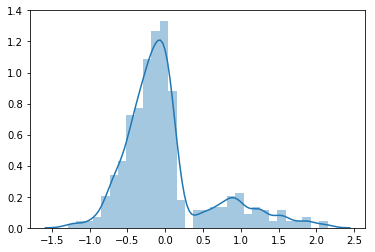

In [66]:
sns.distplot(residual)

In [67]:
residual = pd.Series(residual)

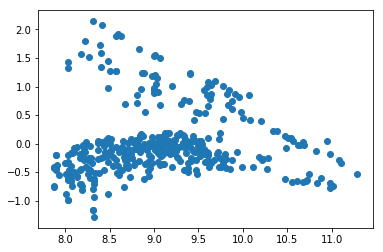

In [68]:
plt.scatter(prediction,residual)
#plt.hlines(0,0,3)

In [69]:
vif = 1/(1-0.64)

In [70]:
vif

2.7777777777777777

In [71]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequence of
        

In [72]:
insurance_data_df['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1329, dtype: int64

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
logreg = LinearRegression()

In [75]:
logreg.fit(feature_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
logreg.score(feature_train,target_train)

0.6139662641767665

In [77]:
logreg.score(feature_test,target_test)

0.6338863814013582

In [78]:
features = data.drop(['MEDV'],axis=1)

NameError: name 'data' is not defined

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split

In [81]:
features = data.drop(['Premium'],axis=1)

NameError: name 'data' is not defined

In [82]:
features = insurance_data_dummy.drop(['Premium'],axis=1)

In [83]:
target = insurance_data_dummy["Premium"]

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
features = features.drop(['gender_male','bmi_Mid','region_southeast'],axis=1)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
feature_train,feature_test,target_train,target_test = train_test_split(features,target,test_size=0.3)

In [88]:
feature_train.head()

,age,bmi_High,children_1,children_2,children_3,children_4,children_5,smoker_occasionally,smoker_yes,region_northwest,region_southwest
1045,43,0,0,1,0,0,0,0,1,1,0
1069,54,1,1,0,0,0,0,0,0,0,0
599,52,1,0,1,0,0,0,0,0,1,0
622,49,0,1,0,0,0,0,0,0,0,1
490,19,1,0,0,0,0,0,0,0,0,1


In [89]:
feature_train.shape

(930, 11)

In [90]:
feature_test.shape


(399, 11)

In [91]:
lin = LinearRegression()

In [92]:
lin.fit(feature_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
lin.score(feature_train,target_train)

0.6335830347669043

In [94]:
lin.score(feature_test,target_test)

0.5837144387997737

In [104]:
lin.coef_

array([ 0.03474168,  0.19128669,  0.16181553,  0.27517836,  0.27199761,
        0.44938347,  0.36785885,  0.33035607,  1.52121015, -0.04980097,
       -0.14134546])

In [95]:
lmbd = [0.1,0.5,1,2,4,6,10,20,30,40]

In [96]:
for i in lmbd:
    ridge = Ridge(alpha=i)           
    ridge.fit(feature_train,target_train)
    print(i,ridge.score(feature_train,target_train),ridge.score(feature_test,target_test))

0.1 0.6335823806556526 0.5837258376309842
0.5 0.6335671468896621 0.5837593815468205
1 0.6335216418498408 0.5837756861305554
2 0.6333528318747899 0.5837310921607464
4 0.6327617010661328 0.5833803770905632
6 0.6319088592457092 0.5827469694825456
10 0.6296394424658542 0.5808400484458586
20 0.6219460652018655 0.5736781165269859
30 0.6127241921833528 0.5646610494590873
40 0.6028657209531547 0.5548515465842623


In [97]:
ridge.coef_

array([ 0.0347691 ,  0.16375329,  0.07106534,  0.18304508,  0.17785906,
        0.12863915,  0.06841388,  0.20054462,  1.08370089, -0.03418178,
       -0.12009151])

In [98]:
lss = Lasso()

In [105]:
lmbd

[0.1, 0.5, 1, 2, 4, 6, 10, 20, 30, 40]

In [107]:
feature_train.head()

,age,bmi_High,children_1,children_2,children_3,children_4,children_5,smoker_occasionally,smoker_yes,region_northwest,region_southwest
1045,43,0,0,1,0,0,0,0,1,1,0
1069,54,1,1,0,0,0,0,0,0,0,0
599,52,1,0,1,0,0,0,0,0,1,0
622,49,0,1,0,0,0,0,0,0,0,1
490,19,1,0,0,0,0,0,0,0,0,1


In [106]:
for i in lmbd:
    lss = Lasso(alpha=i)           
    lss.fit(feature_train,target_train)
    print(i,lss.coef_)

0.1 [ 0.03499836  0.         -0.          0.          0.          0.
  0.          0.          0.58553956 -0.         -0.        ]
0.5 [ 0.0327372  0.        -0.         0.         0.         0.
  0.         0.         0.         0.        -0.       ]
1 [ 0.03023356  0.         -0.          0.          0.          0.
  0.          0.          0.          0.         -0.        ]
2 [ 0.02522629  0.         -0.          0.          0.          0.
  0.          0.          0.          0.         -0.        ]
4 [ 0.01521174  0.         -0.          0.          0.          0.
 -0.          0.          0.         -0.         -0.        ]
6 [ 0.0051972  0.        -0.         0.         0.         0.
 -0.         0.         0.        -0.        -0.       ]
10 [ 0.  0. -0.  0.  0.  0. -0.  0.  0. -0. -0.]
20 [ 0.  0. -0.  0.  0.  0. -0.  0.  0. -0. -0.]
30 [ 0.  0. -0.  0.  0.  0. -0.  0.  0. -0. -0.]
40 [ 0.  0. -0.  0.  0.  0. -0.  0.  0. -0. -0.]


In [103]:
feature_train.head()

,age,bmi_High,children_1,children_2,children_3,children_4,children_5,smoker_occasionally,smoker_yes,region_northwest,region_southwest
1045,43,0,0,1,0,0,0,0,1,1,0
1069,54,1,1,0,0,0,0,0,0,0,0
599,52,1,0,1,0,0,0,0,0,1,0
622,49,0,1,0,0,0,0,0,0,0,1
490,19,1,0,0,0,0,0,0,0,0,1
